## Reference evapotranspiration $ET_o$
### Test code and evaluate methods

In [1]:
import pandas as pd

In [2]:
import sys
sys.path.append('/mnt/gpfs/backup/agri/code/eto/')
import eto

#### Load typical daily weather data

In [3]:
qid = 2075215

In [4]:
wpath = '/mnt/gpfs/backup/agri/models/BRAG/weather/historic/standard/20190401_current/byqid/'
data = pd.read_parquet(wpath+f'{qid}.parquet')
data.head()

pre       et0       tmax       tmin         rs         rh        u2
year month day doy                                                                          
1980 1     1   1    0.642578  2.962157  31.700001  22.500000  13.594242  88.662086  1.390608
           2   2    0.736328  2.799854  30.900000  22.400000  13.344253  91.926628  1.223072
           3   3    0.350343  2.918236  32.900002  22.600000  12.978161  89.244606  1.801918
           4   4    4.738282  4.193033  32.299999  22.600000  20.497023  87.017204  1.785383
           5   5    0.165040  3.459299  29.000000  22.299999  18.324686  92.773224  1.715866

In [5]:
lon, lat = eto.cyqtid2ll(qid)

2075215 -> (-62.125, 3.125)
Level=11 | offset=128.0 | origin=(0.0, 0.0)


#### Calculate ETo using Hargreaves

In [6]:
eto_H = eto.calc_ETo_Hargreaves(data['tmax'], data['tmin'], data.index.get_level_values('doy'), lat=lat)
eto_H.tail()

year  month  day  doy
2018  12     27   361    4.489543
             28   362    4.150036
             29   363    4.498982
             30   364    4.567739
             31   365    4.275100
dtype: float64

#### Calculate ETo using Penman-Monteith

In [7]:
eto_PM = eto.calc_ETo_PenmanMonteith(data['tmax'], data['tmin'], data['rs'], data['rh'], data['u2'], 
                                     data.index.get_level_values('doy'), lat=lat, elevation=0)
eto_PM.tail()

year  month  day  doy
2018  12     27   361    3.588615
             28   362    3.667689
             29   363    3.673539
             30   364    3.623429
             31   365    3.688503
dtype: float64

#### Compare the two

First make DataFrame index into a DateTimeIndex for better plotting.

In [8]:
ix = [pd.Timestamp(f'{y:04}{m:02}{d:02}') for y, m, d, doy in data.index.values]
eto_H_df = pd.DataFrame({'date': ix, 'eto': eto_H.values}).set_index('date')['eto']
eto_PM_df = pd.DataFrame({'date': ix, 'eto': eto_PM.values}).set_index('date')['eto']

Then plot for a given year:

In [9]:
year = 2000

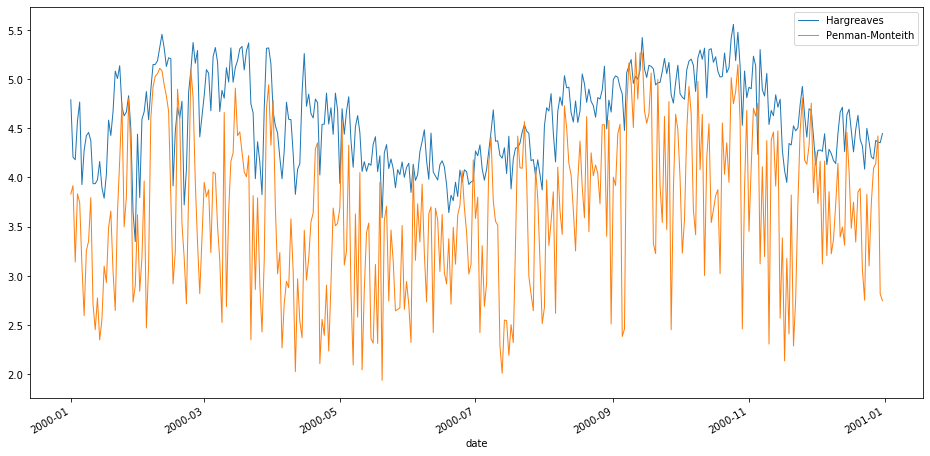

In [10]:
ax = eto_H_df[eto_H_df.index.year==year].plot(figsize=(16,8), linewidth=1, label='Hargreaves')
eto_PM_df[eto_PM_df.index.year==year].plot(ax=ax, linewidth=1, label='Penman-Monteith')
ax.legend();

#### Test the `main()` function

In [11]:
eto.main((qid, 11, 128, 200, 'parquet', wpath, '/home/mchalmers/'))

2075215 -> (-62.125, 3.125)
Level=11 | offset=128.0 | origin=(0.0, 0.0)


In [12]:
df = pd.read_parquet(f'/home/mchalmers/{qid}.parquet')

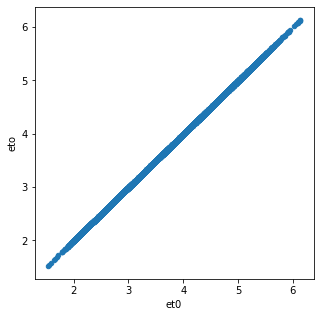

In [13]:
df.plot.scatter('et0', 'eto', figsize=(5,5));